In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv(r"C:\Users\gupta\OneDrive\Desktop\My Projects\Car accident Dataquiest\Dataquest_dataset.csv")
df

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,Male,Car,1,3.248476,Urban,No,Head-on,No,118,Icy
296,Fatal crash,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,Rear-end,No,38,Icy
297,Fatal crash,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,Rear-end,No,80,Wet
298,Fatal crash,44,5,23,Female,Car,3,3.419304,Urban,Yes,Rear-end,Yes,47,Wet


In [4]:
df.isnull().sum()

Crash_Severity            0
Vehicle_Speed             0
Crash_Time                0
Age                       0
Gender                    0
Vehicle_Type              0
Number_of_Lanes           0
Lane_Width                0
Road_Type                 0
Alcohol_Consumption       0
Crash_Type                0
Seatbelt_Usage            0
Speed_Limit               0
Road_Surface_Condition    0
dtype: int64

### catagorical to numeric

In [5]:
df['Gender'] = df['Gender'].replace({
   'Male':1,
   'Female':0 
})

C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\1767275748.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({


In [6]:
df['Alcohol_Consumption']  = df['Alcohol_Consumption'].replace({
  'Yes':1,
  'No':0 })
df['Seatbelt_Usage'] = df['Seatbelt_Usage'].replace({'Yes':1,
  'No':0 })

C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\2205858885.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alcohol_Consumption']  = df['Alcohol_Consumption'].replace({
C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\2205858885.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Seatbelt_Usage'] = df['Seatbelt_Usage'].replace({'Yes':1,


In [7]:
df['Vehicle_Type'] = df['Vehicle_Type'].replace({
  'Heavy Vehicle':6,
  'Car':4,
  'T.W':2  
})

C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\3973287844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Vehicle_Type'] = df['Vehicle_Type'].replace({


### Univiate Analysis

In [ ]:
(df.describe()
    .style
    .background_gradient(cmap='coolwarm') 
    .set_caption("Descriptive Statistics for Selected Crash Severity with major")  
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '2px solid black')]}, 
        {'selector': 'td', 'props': [('border', '1px solid black')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
    ])
)


,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Alcohol_Consumption,Seatbelt_Usage,Speed_Limit
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,64.366667,11.690000,48.663333,0.510000,4.113333,2.000000,3.272374,0.480000,0.476667,74.746667
std,31.951974,6.740327,18.432104,0.500735,1.602826,0.825999,0.143053,0.500435,0.500290,26.857903
min,10.000000,0.000000,18.000000,0.000000,2.000000,1.000000,3.001781,0.000000,0.000000,30.000000
25%,37.000000,5.750000,31.000000,0.000000,2.000000,1.000000,3.150568,0.000000,0.000000,51.000000
50%,60.500000,12.000000,51.000000,1.000000,4.000000,2.000000,3.285620,0.000000,0.000000,75.000000
75%,94.000000,17.000000,65.000000,1.000000,6.000000,3.000000,3.394545,1.000000,1.000000,97.250000
max,120.000000,23.000000,80.000000,1.000000,6.000000,3.000000,3.497986,1.000000,1.000000,120.000000


In [10]:
pd.DataFrame(df['Crash_Severity'].value_counts())


,count
Crash_Severity,
Minor injury,100
Major injury,100
Fatal crash,100


<Figure size 800x600 with 0 Axes>

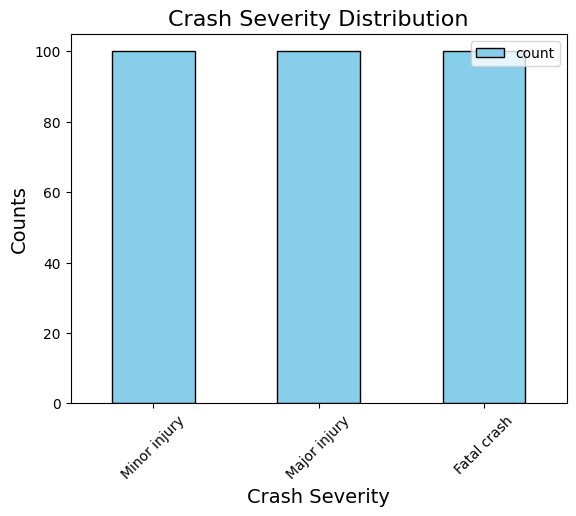

In [ ]:
crash_severity_counts = pd.DataFrame(df['Crash_Severity'].value_counts())
plt.figure(figsize=(8, 6))
crash_severity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Crash Severity Distribution', fontsize=16)
plt.xlabel('Crash Severity', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
crash_type_counts = df['Crash_Type'].value_counts()

# Calculate the percentage
crash_type_percentages = (crash_type_counts / crash_type_counts.sum()) * 100
crash_type_percentages
percentage= pd.DataFrame({
    'counts': crash_type_counts ,
    'Percentage': crash_type_percentages
})
result1 = pd.concat([pd.DataFrame(percentage) ,df.groupby('Crash_Type')['Crash_Severity'].value_counts(normalize=True).unstack()*100
 ] , axis =1)
result1

,counts,Percentage,Fatal crash,Major injury,Minor injury
Crash_Type,,,,,
Rear-end,154,51.333333,31.818182,32.467532,35.714286
Head-on,146,48.666667,34.931507,34.246575,30.821918


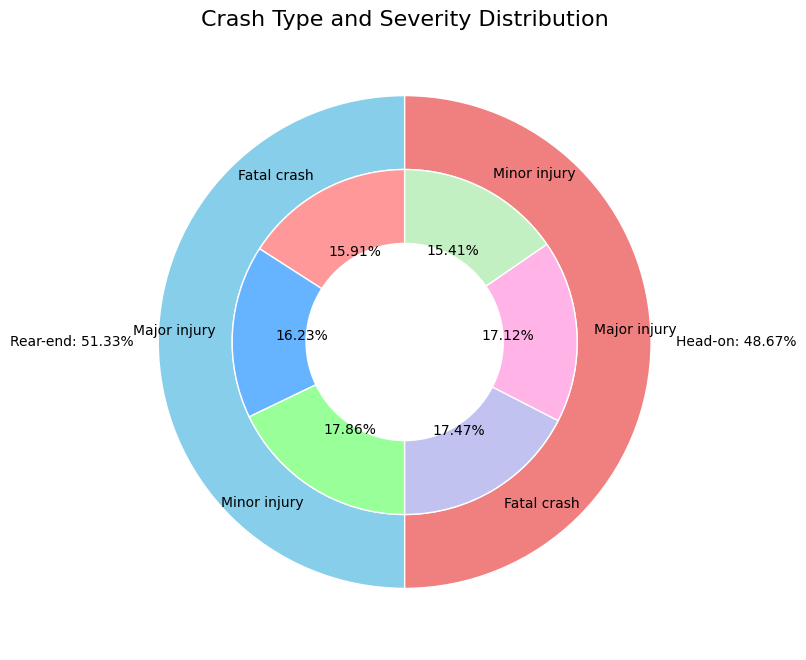

In [22]:
data = {
    'Rear-end': [31.818182, 32.467532, 35.714286],
    'Head-on': [34.931507, 34.246575, 30.821918]
}
categories = ['Fatal crash', 'Major injury', 'Minor injury']

outer_sizes = [sum(data['Rear-end']), sum(data['Head-on'])]
total = sum(outer_sizes)
outer_percentages = [(size / total) * 100 for size in outer_sizes]
outer_labels = [
    f"Rear-end: {51.33:.2f}%",
    f"Head-on: {48.67:.2f}%"
]

inner_sizes = [value for values in data.values() for value in values]
inner_percentages = [(value / total) * 100 for value in inner_sizes]

colors_outer = ['skyblue', 'lightcoral']
colors_inner = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    outer_percentages,
    radius=1,
    labels=outer_labels, 
    colors=colors_outer,
    autopct=None,  
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w')
)
ax.pie(
    inner_percentages,
    radius=0.7,
    labels=categories * len(data),
    colors=colors_inner,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title('Crash Type and Severity Distribution', fontsize=16)
plt.show()


##### conclusion 1 from the pie chart : chances of major injury are more if head-on crash_type_counts 

In [17]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 151.16it/s]


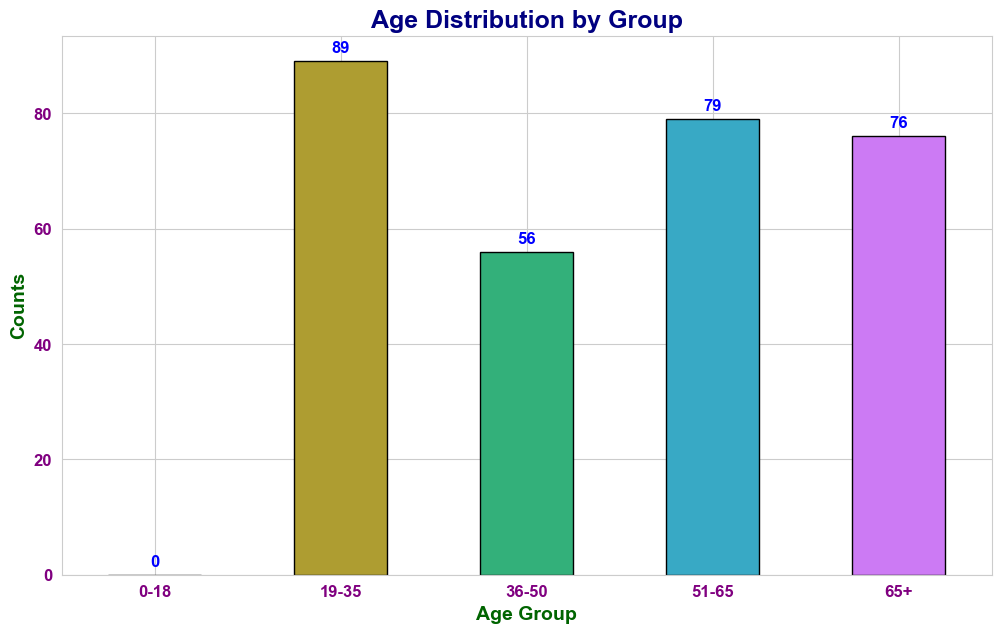

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
bins = [0, 18, 35, 50, 65, 90]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']

Age_Group_Counts = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid") 

custom_colors = sns.color_palette("husl", len(labels)) 

(Age_Group_Counts.value_counts().sort_index()).plot(
    kind='bar',
    color=custom_colors,
    edgecolor='black'
)
plt.title('Age Distribution by Group', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Counts', fontsize=14, fontweight='bold', color='darkgreen')

plt.xticks(rotation=0, fontsize=12, color='purple', fontweight='bold')
plt.yticks(fontsize=12, color='purple', fontweight='bold')

counts = Age_Group_Counts.value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')
plt.show()


#### conclusion 2 : major accident are held in the age group of 19-35

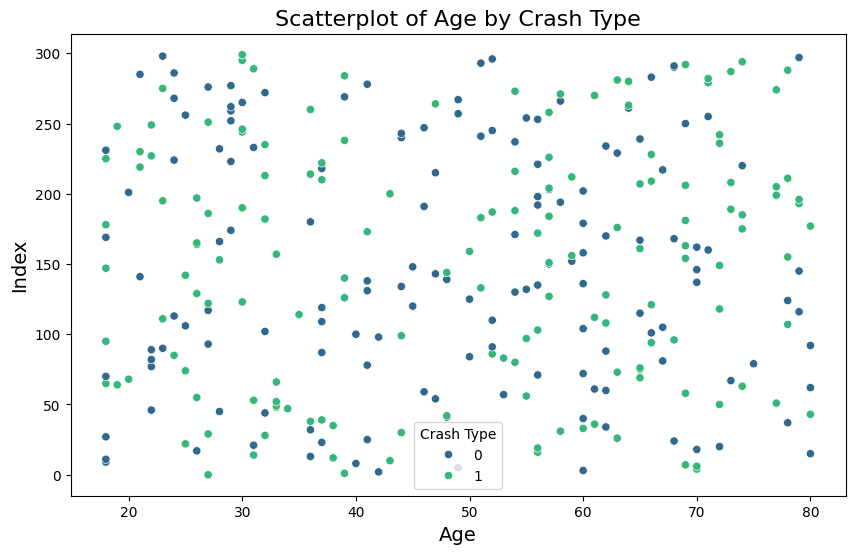

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df.index, hue=df['Gender'], palette='viridis')
plt.title('Scatterplot of Age by Crash Type', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Index', fontsize=14)
plt.legend(title='Crash Type')
plt.show()

Text(0.5, 1.0, ' Vehicle speed Distribution ')

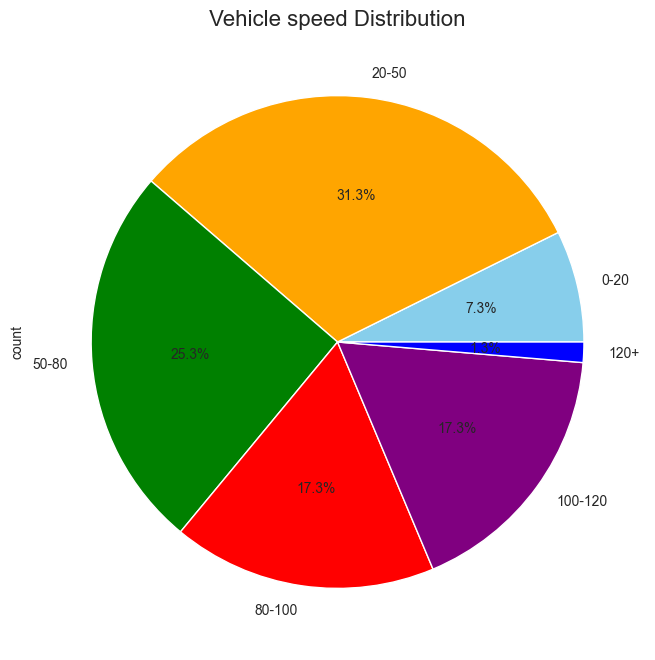

In [11]:
bins = [0, 20, 50, 80, 100, 120 , 150 ]  
labels = ['0-20', '20-50', '50-80', '80-100', '100-120' , '120+' ]
speed_Counts = pd.cut(df['Vehicle_Speed'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple' ,'blue'])
plt.title(' Vehicle speed Distribution ', fontsize=16)

Text(0.5, 1.0, ' Vehicle speed Distribution ')

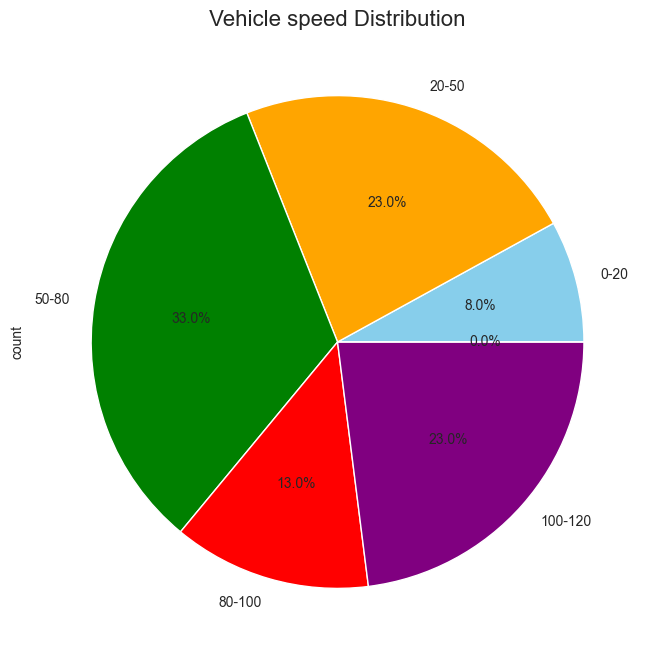

In [17]:
x = df[df['Crash_Severity']=='Fatal crash']
# x['Crash_Severity']
bins = [0, 20, 50, 80, 100, 120 , 150 ]  
labels = ['0-20', '20-50', '50-80', '80-100', '100-120' , '120+' ]
speed_Counts = pd.cut(x['Vehicle_Speed'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple' ,'blue'])
plt.title(' Vehicle speed Distribution ', fontsize=16)


C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\3449488854.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_counts = df.groupby(['Speed_Category', 'Crash_Severity']).size().unstack(fill_value=0)
C:\Users\gupta\AppData\Local\Temp\ipykernel_8864\3449488854.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = total_accidents[i]


<Figure size 1200x800 with 0 Axes>

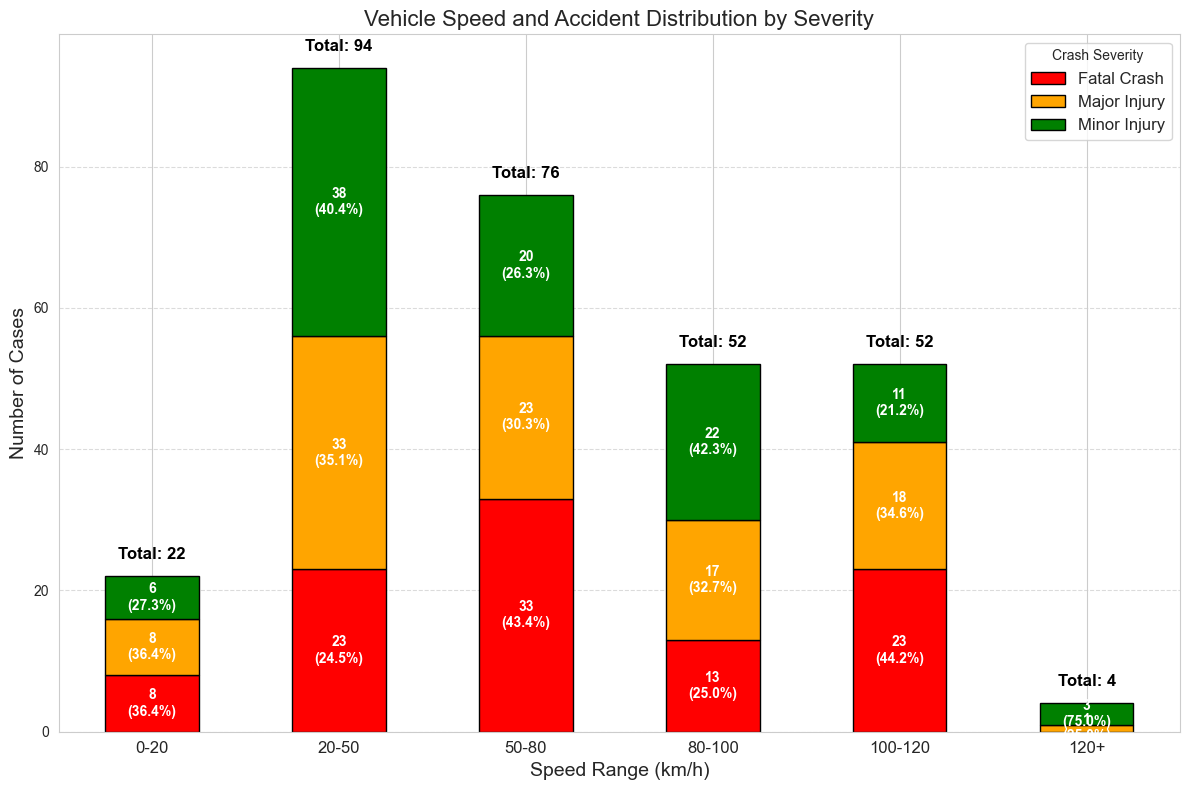

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Binning the speed
bins = [0, 20, 50, 80, 100, 120, 150]
labels = ['0-20', '20-50', '50-80', '80-100', '100-120', '120+']
df['Speed_Category'] = pd.cut(df['Vehicle_Speed'], bins=bins, labels=labels, right=False)

# Grouping data by Speed_Category and Crash Severity
severity_counts = df.groupby(['Speed_Category', 'Crash_Severity']).size().unstack(fill_value=0)

# Calculate percentages for each speed category
severity_percentages = severity_counts.div(severity_counts.sum(axis=1), axis=0) * 100

# Calculate total accidents for each Speed_Category
total_accidents = severity_counts.sum(axis=1)

# Plotting a stacked bar chart
plt.figure(figsize=(12, 8))
ax = severity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['red', 'orange', 'green'],  # Colors for Fatal, Major, and Minor injuries
    edgecolor='black'
)

# Adding counts and percentages on the bars
for i, speed_category in enumerate(severity_counts.index):
    total = total_accidents[i]
    bottom = 0
    for severity, color in zip(severity_counts.columns, ['red', 'orange', 'green']):
        count = severity_counts.loc[speed_category, severity]
        percentage = severity_percentages.loc[speed_category, severity]
        if count > 0:
            ax.text(
                i, bottom + count / 2,
                f'{count}\n({percentage:.1f}%)',
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )
        bottom += count

# Adding total accidents at the top of each bar group
for index, total in enumerate(total_accidents):
    ax.text(
        index, 
        total + 2,  # Position slightly above the bars
        f'Total: {total}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

# Customizing the plot
plt.title('Vehicle Speed and Accident Distribution by Severity', fontsize=16)
plt.xlabel('Speed Range (km/h)', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Crash Severity', labels=['Fatal Crash', 'Major Injury', 'Minor Injury'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [90]:
df['Gender'].value_counts()

Gender
1    153
0    147
Name: count, dtype: int64

In [ ]:
pd.DataFrame(df.groupby('Crash_Severity')['Gender'].value_counts())
# accident of mens are more than womens

count
Crash_Severity Gender       
Fatal crash    0          50
               1          50
Major injury   1          51
               0          49
Minor injury   1          52
               0          48

In [94]:
pd.DataFrame(df.groupby('Crash_Severity')['Vehicle_Type'].value_counts())


count
Crash_Severity Vehicle_Type       
Fatal crash    6                38
               2                34
               4                28
Major injury   2                36
               4                32
               6                32
Minor injury   4                47
               6                35
               2                18

#### conclusion 3 : major and fatal injuries are in car or in heavy vehicle

In [ ]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
4    107
6    105
2     88
Name: count, dtype: int64

In [98]:
pd.DataFrame(df.groupby('Crash_Severity')['Number_of_Lanes'].value_counts())


count
Crash_Severity Number_of_Lanes       
Fatal crash    3                   36
               2                   33
               1                   31
Major injury   1                   38
               2                   32
               3                   30
Minor injury   3                   36
               1                   33
               2                   31

In [ ]:
coclusion 3 : more accidents in lanes 3 and 1

In [99]:
df['Number_of_Lanes'].value_counts()

Number_of_Lanes
3    102
1    102
2     96
Name: count, dtype: int64

Text(0.5, 1.0, 'lane width Distribution ')

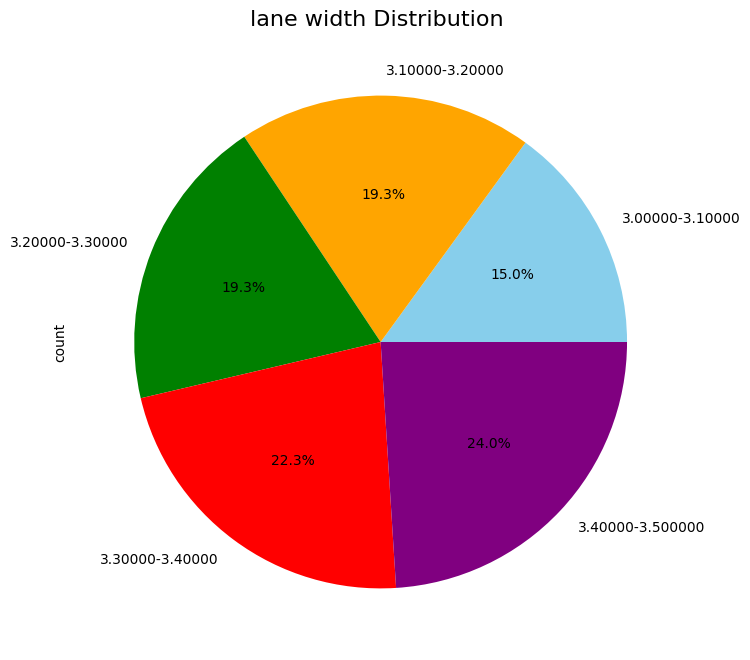

In [113]:
# pd.DataFrame(df.groupby('Crash_Severity')['Lane_Width'].value_counts())
bins = [3.00000, 3.10000,3.20000 , 3.30000, 3.40000, 3.500000]  
labels = ['3.00000-3.10000', '3.10000-3.20000', '3.20000-3.30000', '3.30000-3.40000' ,'3.40000-3.500000' ]
speed_Counts = pd.cut(df['Lane_Width'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple' ,'blue'])
plt.title('lane width Distribution ', fontsize=16)


#### conclusion number 4 : as width of lanes increases , accidents also inceases 

In [114]:
df

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,1,6,2,3.484386,Urban,1,Rear-end,0,30,Icy
1,Minor injury,27,16,39,1,4,2,3.293091,Rural,1,Rear-end,1,110,Dry
2,Minor injury,87,14,42,0,4,3,3.218911,Urban,0,Rear-end,0,59,Dry
3,Minor injury,43,3,60,0,6,2,3.113012,Rural,0,Rear-end,0,73,Wet
4,Minor injury,72,8,70,1,2,3,3.106580,Urban,1,Rear-end,1,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,4,1,3.248476,Urban,0,Head-on,0,118,Icy
296,Fatal crash,87,21,52,0,6,2,3.037739,Urban,1,Rear-end,0,38,Icy
297,Fatal crash,85,20,79,0,6,2,3.350668,Rural,1,Rear-end,0,80,Wet
298,Fatal crash,44,5,23,0,4,3,3.419304,Urban,1,Rear-end,1,47,Wet


In [117]:
pd.DataFrame(df.groupby('Crash_Severity')['Road_Type'].value_counts())


count
Crash_Severity Road_Type       
Fatal crash    Rural         52
               Urban         48
Major injury   Rural         53
               Urban         47
Minor injury   Rural         50
               Urban         50

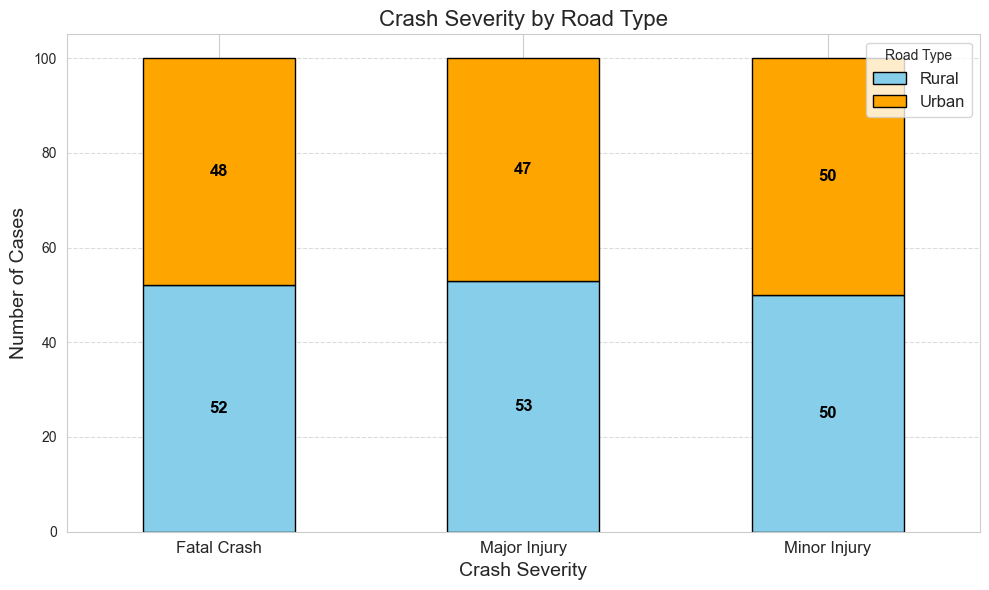

In [23]:
import matplotlib.pyplot as plt

# Data
data = {
    'Fatal Crash': {'Rural': 52, 'Urban': 48},
    'Major Injury': {'Rural': 53, 'Urban': 47},
    'Minor Injury': {'Rural': 50, 'Urban': 50}
}

# Converting the dictionary into a DataFrame
df_plot = pd.DataFrame(data).T

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot
df_plot.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black', ax=ax)

# Adding counts inside the bars
for i, (severity, counts) in enumerate(df_plot.iterrows()):
    bottom = 0
    for road_type, color in zip(counts.index, ['skyblue', 'orange']):
        count = counts[road_type]
        ax.text(
            i, 
            bottom + count / 2, 
            f'{count}', 
            ha='center', 
            va='center', 
            color='black', 
            fontsize=12, 
            fontweight='bold'
        )
        bottom += count

# Customizing the plot
plt.title('Crash Severity by Road Type', fontsize=16)
plt.xlabel('Crash Severity', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Road Type', labels=['Rural', 'Urban'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


#### conclusion 5 : more number of accident occure in Rular Roads

In [118]:
pd.DataFrame(df.groupby('Crash_Severity')['Alcohol_Consumption'].value_counts())


count
Crash_Severity Alcohol_Consumption       
Fatal crash    0                       58
               1                       42
Major injury   1                       52
               0                       48
Minor injury   0                       50
               1                       50

In [120]:
pd.DataFrame(df.groupby('Crash_Severity')['Seatbelt_Usage'].value_counts())

count
Crash_Severity Seatbelt_Usage       
Fatal crash    0                  53
               1                  47
Major injury   1                  52
               0                  48
Minor injury   0                  56
               1                  44

In [122]:
df['Seatbelt_Usage'].value_counts()

Seatbelt_Usage
0    157
1    143
Name: count, dtype: int64

#### conclusion 5 :  who have not wear seat belt face less injury

In [ ]:
overspeed = df[df['Speed_Limit'] < df['Vehicle_Speed']]
overspeed['Crash_Severity'].value_counts()


Crash_Severity
Major injury    45
Fatal crash     44
Minor injury    39
Name: count, dtype: int64

In [128]:
lowerspeed = df[df['Speed_Limit'] > df['Vehicle_Speed']]
lowerspeed['Crash_Severity'].value_counts()

Crash_Severity
Minor injury    60
Fatal crash     55
Major injury    54
Name: count, dtype: int64

### conclusion 6 : out of 300  , 128 were over speeded , in this case major injury and fatal crash chances are more 

In [27]:
x = pd.DataFrame(df.groupby('Crash_Severity')['Road_Surface_Condition'].value_counts())
x

count
Crash_Severity Road_Surface_Condition       
Fatal crash    Wet                        40
               Icy                        35
               Dry                        25
Major injury   Dry                        34
               Icy                        33
               Wet                        33
Minor injury   Wet                        38
               Dry                        34
               Icy                        28

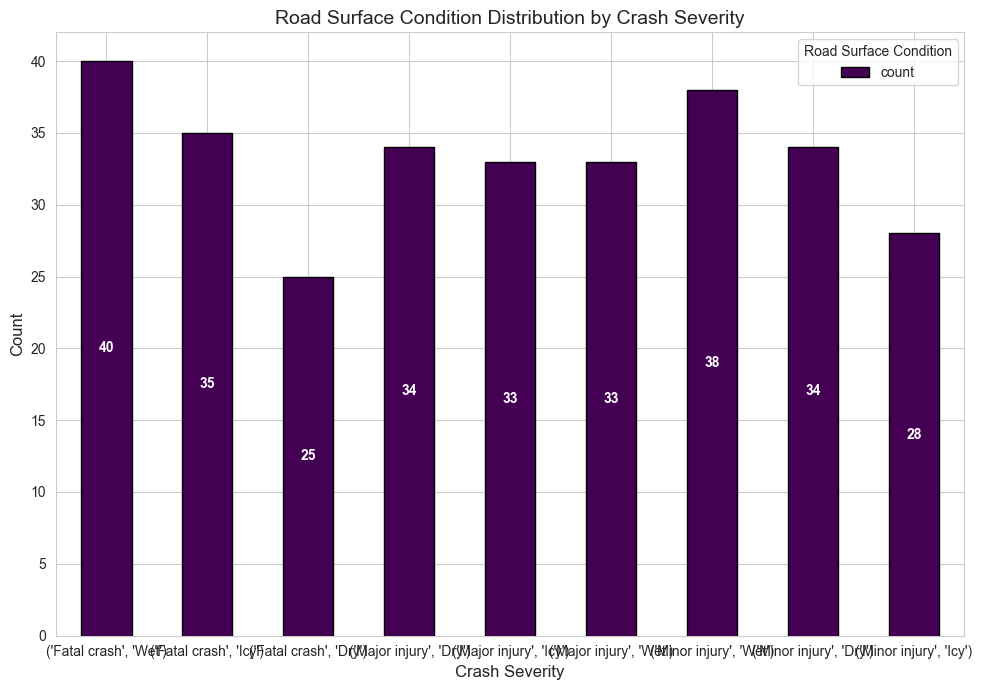

In [28]:
# Plotting with exact counts displayed on the bars
fig, ax = plt.subplots(figsize=(10, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for the bars

# Plot stacked bar chart
bars = x.plot(kind='bar', stacked=True, colormap='viridis', ax=ax, edgecolor='black')

# Annotate exact counts on each segment
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero values
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
                bar.get_y() + height / 2,          # Y-coordinate (center of segment)
                int(height),                       # Text (count value)
                ha='center', va='center',         # Align center
                fontsize=10, color='white', weight='bold'  # Styling
            )

# Customize plot appearance
ax.set_title('Road Surface Condition Distribution by Crash Severity', fontsize=14)
ax.set_xlabel('Crash Severity', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Road Surface Condition', fontsize=10)
ax.set_xticks(range(len(x.index)))
ax.set_xticklabels([x for x in x.index], rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [132]:
df['Road_Surface_Condition'].value_counts()

Road_Surface_Condition
Wet    111
Icy     96
Dry     93
Name: count, dtype: int64

#### conclusion 7 : more accident in wet roads and more injuries also

In [10]:
df

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,1,6,2,3.484386,Urban,1,Rear-end,0,30,Icy
1,Minor injury,27,16,39,1,4,2,3.293091,Rural,1,Rear-end,1,110,Dry
2,Minor injury,87,14,42,0,4,3,3.218911,Urban,0,Rear-end,0,59,Dry
3,Minor injury,43,3,60,0,6,2,3.113012,Rural,0,Rear-end,0,73,Wet
4,Minor injury,72,8,70,1,2,3,3.106580,Urban,1,Rear-end,1,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,4,1,3.248476,Urban,0,Head-on,0,118,Icy
296,Fatal crash,87,21,52,0,6,2,3.037739,Urban,1,Rear-end,0,38,Icy
297,Fatal crash,85,20,79,0,6,2,3.350668,Rural,1,Rear-end,0,80,Wet
298,Fatal crash,44,5,23,0,4,3,3.419304,Urban,1,Rear-end,1,47,Wet


Text(0.5, 1.0, 'time Distribution ')

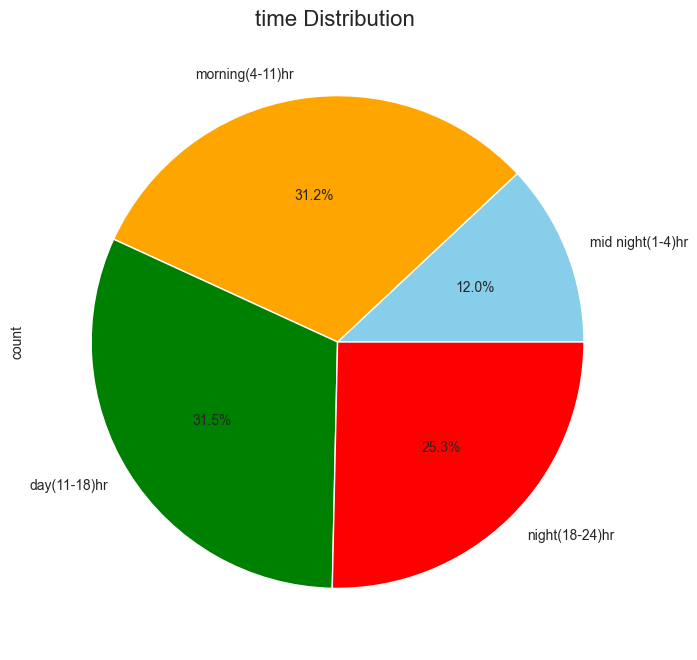

In [30]:
bins = [1, 4,11 ,18, 24] 
labels = ['mid night(1-4)hr', 'morning(4-11)hr', 'day(11-18)hr', 'night(18-24)hr']
speed_Counts = pd.cut(df['Crash_Time'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('time Distribution ', fontsize=16)

#### conclusion 8 : most of the accident happen in day time

### multivariate analysis

In [72]:
major = df[(df['Crash_Severity'] == 'Fatal crash') | (df['Crash_Severity'] == 'Major injury')]
major

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
100,Major injury,39,3,40,0,4,3,3.227760,Rural,0,Rear-end,0,67,Wet
101,Major injury,55,18,66,0,4,2,3.358975,Urban,0,Rear-end,0,32,Icy
102,Major injury,31,16,32,0,4,3,3.461152,Rural,1,Head-on,1,66,Wet
103,Major injury,34,15,56,1,6,1,3.453363,Urban,0,Head-on,0,71,Icy
104,Major injury,33,1,60,0,6,1,3.106514,Rural,1,Rear-end,0,97,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,4,1,3.248476,Urban,0,Head-on,0,118,Icy
296,Fatal crash,87,21,52,0,6,2,3.037739,Urban,1,Rear-end,0,38,Icy
297,Fatal crash,85,20,79,0,6,2,3.350668,Rural,1,Rear-end,0,80,Wet
298,Fatal crash,44,5,23,0,4,3,3.419304,Urban,1,Rear-end,1,47,Wet


In [73]:
minor = df[df['Crash_Severity']== 'Minor injury']
minor

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,1,6,2,3.484386,Urban,1,Rear-end,0,30,Icy
1,Minor injury,27,16,39,1,4,2,3.293091,Rural,1,Rear-end,1,110,Dry
2,Minor injury,87,14,42,0,4,3,3.218911,Urban,0,Rear-end,0,59,Dry
3,Minor injury,43,3,60,0,6,2,3.113012,Rural,0,Rear-end,0,73,Wet
4,Minor injury,72,8,70,1,2,3,3.106580,Urban,1,Rear-end,1,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Minor injury,120,4,18,1,6,1,3.495500,Urban,0,Head-on,0,43,Dry
96,Minor injury,40,6,68,1,2,3,3.452586,Urban,0,Head-on,1,79,Dry
97,Minor injury,22,18,55,1,4,1,3.432739,Rural,1,Head-on,0,30,Wet
98,Minor injury,72,10,42,0,6,2,3.102667,Rural,0,Head-on,0,112,Dry


Text(0.5, 1.0, 'time Distribution with major injuries')

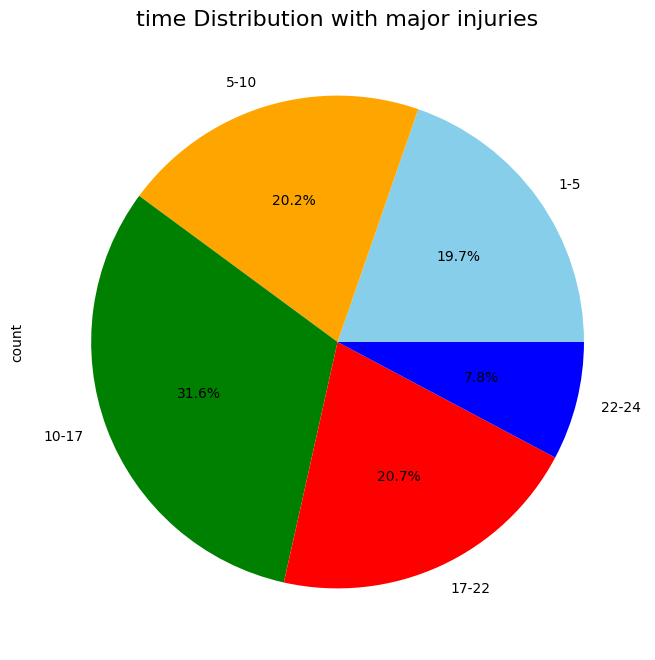

In [37]:
bins = [1, 5,10 ,17,22,24] 
labels = ['1-5' , '5-10' , '10-17' , '17-22' , '22-24']
speed_Counts = pd.cut(df[(df['Crash_Severity']== 'Fatal crash') | (df['Crash_Severity']=='Major injury')]['Crash_Time'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red' ,'blue'])
plt.title('time Distribution with major injuries', fontsize=16)

Text(0.5, 1.0, 'time Distribution with major injuries')

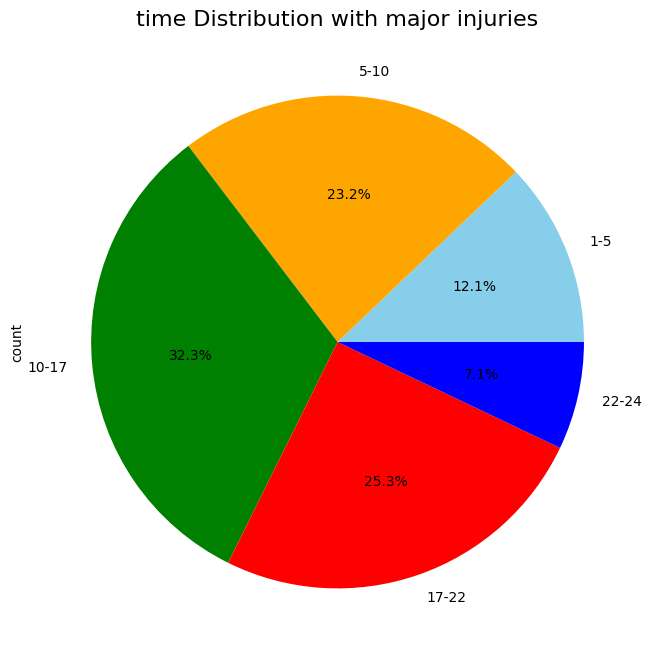

In [36]:
bins = [1, 5,10 ,17,22,24] 
labels = ['1-5' , '5-10' , '10-17' , '17-22' , '22-24']
speed_Counts = pd.cut(df[df['Crash_Severity']=='Minor injury']['Crash_Time'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 8))
(speed_Counts.value_counts().sort_index()).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red' , 'blue'])
plt.title('time Distribution with major injuries', fontsize=16)

#### conclusion  : at the time of 10 - 4 , major and minor injuries are more

In [ ]:
(
    df[(df['Crash_Severity'] == 'Fatal crash') | (df['Crash_Severity'] == 'Major injury')]
    .describe()
    .style
    .background_gradient(cmap='coolwarm') 
    .set_caption("Descriptive Statistics for Selected Crash Severity with major")  
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '2px solid black')]}, 
        {'selector': 'td', 'props': [('border', '1px solid black')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
    ])
)



,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Alcohol_Consumption,Seatbelt_Usage,Speed_Limit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,63.960000,11.860000,51.100000,0.510000,3.920000,1.920000,3.297269,0.520000,0.520000,76.420000
std,32.226760,6.764464,17.978944,0.502418,1.655600,0.824866,0.141072,0.502117,0.502117,26.853580
min,14.000000,0.000000,18.000000,0.000000,2.000000,1.000000,3.005611,0.000000,0.000000,31.000000
25%,34.750000,6.000000,35.750000,0.000000,2.000000,1.000000,3.173708,0.000000,0.000000,56.000000
50%,60.000000,13.000000,54.500000,1.000000,4.000000,2.000000,3.323539,1.000000,1.000000,78.000000
75%,94.000000,17.000000,65.250000,1.000000,6.000000,3.000000,3.413938,1.000000,1.000000,98.500000
max,120.000000,23.000000,80.000000,1.000000,6.000000,3.000000,3.497986,1.000000,1.000000,120.000000


average speed in fatal crash and major injuries is more

In [48]:
(df[df['Crash_Severity']== 'Minor injury'].describe()
    .style
    .background_gradient(cmap='coolwarm') 
    .set_caption("Descriptive Statistics for Selected Crash Severity with minor injuries")  
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '2px solid black')]}, 
        {'selector': 'td', 'props': [('border', '1px solid black')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
    ])
)

,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Alcohol_Consumption,Seatbelt_Usage,Speed_Limit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,61.660000,12.370000,47.020000,0.520000,4.340000,2.030000,3.264810,0.500000,0.440000,73.310000
std,31.475891,6.492661,18.694773,0.502117,1.422901,0.834302,0.142427,0.502519,0.498888,27.818566
min,10.000000,0.000000,18.000000,0.000000,2.000000,1.000000,3.001781,0.000000,0.000000,30.000000
25%,34.500000,6.750000,31.750000,0.000000,4.000000,1.000000,3.146507,0.000000,0.000000,49.000000
50%,57.000000,13.000000,46.500000,1.000000,4.000000,2.000000,3.266073,0.500000,0.000000,73.000000
75%,90.000000,18.000000,62.250000,1.000000,6.000000,3.000000,3.388657,1.000000,1.000000,97.500000
max,120.000000,23.000000,80.000000,1.000000,6.000000,3.000000,3.495500,1.000000,1.000000,120.000000


In [ ]:
df[df['Vehicle_Speed'] > df['Speed_Limit']]['Crash_Severity'].value_counts()
#in case of overspeeding chances of major injuries are more

Crash_Severity
Major injury    45
Fatal crash     44
Minor injury    39
Name: count, dtype: int64

In [11]:
pd.DataFrame(df[df['Vehicle_Speed'] > df['Speed_Limit']].groupby('Crash_Severity')['Gender'].value_counts())
# women do overspeeding  more than mens , so chanses of major injuries are more to womens 

count
Crash_Severity Gender       
Fatal crash    0          23
               1          21
Major injury   0          29
               1          16
Minor injury   1          21
               0          18

In [94]:
df

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,1,6,2,3.484386,Urban,1,Rear-end,0,30,Icy
1,Minor injury,27,16,39,1,4,2,3.293091,Rural,1,Rear-end,1,110,Dry
2,Minor injury,87,14,42,0,4,3,3.218911,Urban,0,Rear-end,0,59,Dry
3,Minor injury,43,3,60,0,6,2,3.113012,Rural,0,Rear-end,0,73,Wet
4,Minor injury,72,8,70,1,2,3,3.106580,Urban,1,Rear-end,1,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,4,1,3.248476,Urban,0,Head-on,0,118,Icy
296,Fatal crash,87,21,52,0,6,2,3.037739,Urban,1,Rear-end,0,38,Icy
297,Fatal crash,85,20,79,0,6,2,3.350668,Rural,1,Rear-end,0,80,Wet
298,Fatal crash,44,5,23,0,4,3,3.419304,Urban,1,Rear-end,1,47,Wet


In [ ]:
# pd.DataFrame(df[df['Vehicle_Speed'] > df['Speed_Limit']]['Road_Surface_Condition']).value_counts()
pd.DataFrame(df[df['Vehicle_Speed'] > df['Speed_Limit']].groupby('Road_Surface_Condition')['Crash_Severity'].value_counts())
# in rainy season people do overspeeding more , 
# and more chances of major injuries and Fatal crush

count
Road_Surface_Condition Crash_Severity       
Dry                    Major injury       14
                       Minor injury       11
                       Fatal crash         8
Icy                    Major injury       15
                       Minor injury       14
                       Fatal crash        13
Wet                    Fatal crash        23
                       Major injury       16
                       Minor injury       14

In [ ]:
pd.DataFrame(df[df['Vehicle_Speed'] > df['Speed_Limit']].groupby('Road_Type')['Crash_Severity'].value_counts())
# overspeeding is more in rular areas and more dangeroues also

count
Road_Type Crash_Severity       
Rural     Fatal crash        24
          Major injury       22
          Minor injury       19
Urban     Major injury       23
          Fatal crash        20
          Minor injury       20